# Πρώτη Άσκηση νευρωνικών

Ομάδα 49 <br>
Γιάννης Βουλγαρίδης, 03116151 <br>
Μαρία-Ιωάννα Σωτηρίου, 03116090 <br>
Ευάγγελος Ζάχος, 03116015 <br> 

# "Μικρό" Dataset s09 (sonar) 

## Βασικές Πληροφορίες.
1. Το dataset αυτό περιέχει μετρήσεις βάσει των οποίων κατατάσσονται κάποια αντικέιμενα ως νάρκες(μεταλλικοί κύλινδροι) ή ως βράχοι. Τα 60 χαρακτηριστικά του κάθε δείγματος είναι η τιμή της ενέργειας που λαμβάνεται σε για μια συχνότητα. Άρα όλα τα χαρακτηριστικά εχουν διάταξη.  
2. Το dataset περιέχει 207 δείγματα και κάθε δείγμα έχει 60 χαρακτηριστικά. Όπως αναφέρεατι και στο (1.) δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά.  
3. Δεν υπάρχουν επικεφαλίδες ή αρίθμιση γραμμών. 
4. Οι ετικέτες  βρίσκονται στην τελευταία στήλη του αρχείου δεδομένων και παίρνουν τιμές 'M' ή 'R' (metal/rock) κια για την τις ανάγκες της ανάπτυξης κωδικοποιούμε το 'M' με 0 και το 'R' με 1. 
5. Η μόνη αλλάγή που χρειάστηκε να γίνει στο dataset ήταν η απεικόνηση των ετικετών σε ακεραίους όπως περιγράφεται παραπάνω. 
6. Το dataset δεν έχει απουσιάζουσες τιμές όπως λέει και το documentation του Dataset στο UCI. Στην περίπτωση που υπήρχαν, θα μπορούσαμε να τις αντικαταστήσουμε με την μέση τιμή του αντίστοιχου χαρακτηριστικού, αν τα κενά αυτά δεν αποτελούν μεγάλο ποσοστό των δεδομένων. 
7. Υπάρχουν μόνο δύο (2) κλάσεις ('M', 'R').  Από τα 207 δείγματα τα 111 (53.6%) είναι της κλάσης 'Μ' και τα 96 (46.4%)  είναι της κλάσης 'R' και ως εκ τούτου το dataset θεωρείται ισοροπημένο.
8. Στο επόμενο κελί υπάρχει και ο χωρισμός των δεδομένων σε train και test με χρήση της μεθόδου train_test_split η οποία χωρίζει τα υπάρχονται δεδομένα έτσι ώστε το 1/3 των δεδομένων να είναι για testing.


Sonar dataset (s09) has 207 instances and each one has 60 atributes
111 instances of METAL and 96 instances of ROCK in the dataset


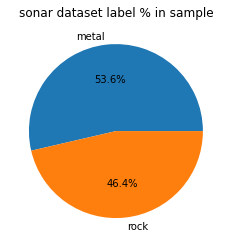

This Dataset (sonar) is considered balanced! :)
There are no missing values in this dataset (sonar)


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

'''
Read small dataset
variables starting with s refer to (s)mall dataset 
variables starting with b refer to (b)ig dataset 
'''
stime = {}
sMapping = {'M' : 0, 'R' : 1}
sfd = pd.read_csv('sonar.all-data').values
sLabels = pd.DataFrame(sfd[ : , sfd.shape[1]-1])[0].map(sMapping).values
sData = sfd[: , :sfd.shape[1] - 1]
print('Sonar dataset (s09) has {} instances and each one has {} atributes'.format(sData.shape[0],sData.shape[1]))
slCount = np.bincount(sLabels)
print('{} instances of METAL and {} instances of ROCK in the dataset'.format(slCount[0] , slCount[1]) )
plt.figure(1)
plt.pie(slCount , labels = ['metal' ,'rock'], autopct='%1.1f%%')
plt.title('sonar dataset label % in sample')
plt.show()


print('This Dataset (sonar) is considered balanced! :)')
print('There are no missing values in this dataset (sonar)')

TEST_SIZE = 0.2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,f1_score
trainData, testData, trainLabels, testLabels = train_test_split(sData , sLabels , test_size = TEST_SIZE)
from sklearn.model_selection import cross_val_score

Ακολουθεί η κατασκευή, εκπαίδευση και αποτίμηση διάφορων  Dummy Classifiers. Η αποτίμηση γίνεται μέσω των μετρικών f1_macro, f1_micro avg  και από τον πίνακα σύγχυσης (confusion matrix) όπως ζητείται από την εκφώνηση. Οι Dummy Classifiers έχουν f1_macro scores γύρω στο 40% με 5% σφάλμα (37-43%) και αυτό που αξίζει να δούμε είναι οι πίνακες σύγχησης. Για παράδειγμα, για τον "χαζό" σταθερό ταξινομήτη που επιστρέφει πάντα την κλάση που κωδικοποιέιται ως '1' βλέπουμε ότι ταξινόμησε και τα 27 σωστά (στοιχείο[2,2] του πίνακα) και τα 15 της κλάσης '0' τα τοποθέτησε επίσης λανθασμένα στην κλάση 1 (false posotives). Όμοιοι είναι και οι πίνακες για τους ταξινομητές constant=0 και most_frequent. Η διαφορά του most_frequent είναι ότι δεν δέχεται από τον σχεδιαστή την σταθερά αλλά την εξάγει μόνος του βάσει του ποσοστού που εμφανίζεται κάθε ετικέτα στο dataset.

In [ ]:

'''
messing with various dummy Classifiers
'''
from sklearn.metrics import precision_score, recall_score

sf1MacroArr = [] 
sf1MicroArr = [] 

sf1MacroDict = dict()
sf1MicroDict = dict()
sf1MacroDictOpt = {}
sf1MicroDictOpt = {}

from sklearn.dummy import DummyClassifier
DummyModels = []
DummyModels.append(DummyClassifier(strategy =  'uniform',  random_state=1))
DummyModels.append(DummyClassifier(strategy =  'constant', constant=0,random_state=1))
DummyModels.append(DummyClassifier(strategy =  'constant', constant=1 ,random_state=1))
DummyModels.append(DummyClassifier(strategy =  'stratified', random_state=1))
DummyModels.append(DummyClassifier(strategy =  'most_frequent', random_state=1))

for model in DummyModels:
  model.fit(trainData,trainLabels)
  preds = model.predict(testData)
  if model.strategy=='constant':
    print('for dummy model with strategy {} and constant {}'.format(model.strategy,model.constant))
  else:
    print('for dummy model with strategy {}'.format(model.strategy))
  f1_macro = f1_score(testLabels, preds, average='macro')
  sf1MacroArr.append(f1_macro)
  f1_micro = f1_score(testLabels, preds, average='micro')
  sf1MicroArr.append(f1_micro)
  p = precision_score(testLabels,preds)
  r = recall_score(testLabels,preds)
  print('precision = {:.5f} and recall = {:.5f}'.format(p,r))
  print('macro average:\t{:.3f}\tmicro average:\t{:.3f}'.format(f1_macro,f1_micro))
  print('confusion matrix:')
  res = confusion_matrix(testLabels,preds)
  print(res)
  print('---------------------------------------------')



for dummy model with strategy uniform
precision = 0.76190 and recall = 0.69565
macro average:	0.714	micro average:	0.714
confusion matrix:
[[14  5]
 [ 7 16]]
---------------------------------------------
for dummy model with strategy constant and constant 0
precision = 0.00000 and recall = 0.00000
macro average:	0.311	micro average:	0.452
confusion matrix:
[[19  0]
 [23  0]]
---------------------------------------------
for dummy model with strategy constant and constant 1
precision = 0.54762 and recall = 1.00000
macro average:	0.354	micro average:	0.548
confusion matrix:
[[ 0 19]
 [ 0 23]]
---------------------------------------------
for dummy model with strategy stratified
precision = 0.61111 and recall = 0.47826
macro average:	0.547	micro average:	0.548
confusion matrix:
[[12  7]
 [12 11]]
---------------------------------------------
for dummy model with strategy most_frequent
precision = 0.00000 and recall = 0.00000
macro average:	0.311	micro average:	0.452
confusion matrix:
[[19

Παρακάτω ακολουθεί η κατασκευή, εκπαίδευση και αποτίμηση ενός μοντέλου Naive Bayes Gaussian. Η αποτίμηση γίνεται βάσει των μετρικών που ζητούνται στην εκφώνηση. Αυτό το μοντέλο είναι πολύ ανώτερο των Dummy Classifiers και πετυχαίνει απόδοση f1_macro = 70% και f1_micro avg = 73.8%.

In [ ]:
'''
naive bayes classifier
'''
from sklearn.naive_bayes import GaussianNB
modelNBC = GaussianNB()
modelNBC.fit(trainData,trainLabels)
preds = modelNBC.predict(testData)
f1_macro = f1_score(testLabels, preds, average='macro')
f1_micro = f1_score(testLabels, preds, average='micro')
p = precision_score(testLabels,preds)
r = recall_score(testLabels,preds)
print('precision = {:.5f} and recall = {:.5f}'.format(p,r))
sf1MacroArr.append(f1_macro)
sf1MicroArr.append(f1_micro)
sf1MacroDict['bayes'] = f1_macro
sf1MicroDict['bayes'] = f1_micro
print('macro average:\t{:.3f}\tmicro average:\t{:.3f}'.format(f1_macro,f1_micro))
print('confusion matrix:')
res = confusion_matrix(testLabels,preds)
print(res)

precision = 0.75000 and recall = 0.91304
macro average:	0.775	micro average:	0.786
confusion matrix:
[[12  7]
 [ 2 21]]


Στο επόμενο κελί κώδικα κατασκευάζεται, εκπαιδεύεται και αποτιμάται ένα μοντέλο KNeighborsClassifier. Το μοντέλο αυτό δέχεται μια υπερμαράμετρο που ορίζει πόσους από τους πλησιέστρους γείτονες εξετάζουμε ως προς την κατηγορία, προκειμένου να ταξινομήσουμε ένα νέο δείγμα. Αρχικά αγνοούμε αυτή την παράμετρο και η τιμή αυτή λαμβάνει μια προκαθορισμένη. Στην συνέχεια θα την αποτιμήσουμε χρησιμοποιώντας trial and erro μέθοδο. Θα κατασκευάσουμε πολλά ίδια μοντέλα με διαφορετική τιμή υπερμαραμέτρου, θα τα αποτιμήσουμε όλα και εν τέλει θα κρατήσουμε αυτό που μεγιστοποιεί το score που θέτουμε (f1_macro/micro).   

In [ ]:
'''
KNN classifier
'''
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier()
print(modelKNN)
modelKNN.fit(trainData,trainLabels)
preds = modelKNN.predict(testData)
f1_macro = f1_score(testLabels, preds, average='macro')
f1_micro = f1_score(testLabels, preds, average='micro')
sf1MacroArr.append(f1_macro)
sf1MicroArr.append(f1_micro)
sf1MacroDict['knn'] = f1_macro
sf1MicroDict['knn'] = f1_micro
p = precision_score(testLabels,preds)
r = recall_score(testLabels,preds)
print('precision = {:.5f} and recall = {:.5f}'.format(p,r))
print('macro average:\t{:.3f}\tmicro average:\t{:.3f}'.format(f1_macro,f1_micro))
print('confusion matrix:')
res = confusion_matrix(testLabels,preds)
print(res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
precision = 0.88889 and recall = 0.69565
macro average:	0.786	micro average:	0.786
confusion matrix:
[[17  2]
 [ 7 16]]


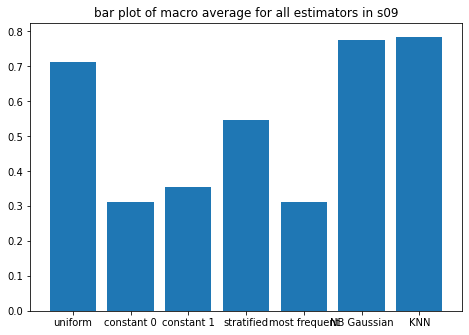

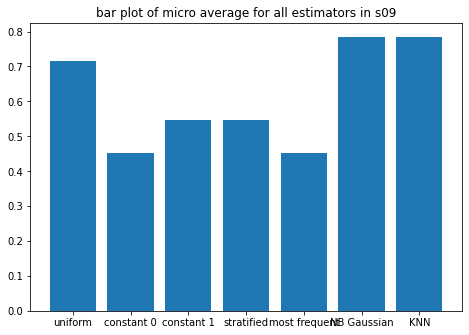

In [ ]:
models = ['uniform' , 'constant 0', 'constant 1', 'stratified' , 'most frequent' , 'NB Gaussian' , 
          'KNN'] 
fig = plt.figure(3)
ax = fig.add_axes([0,0,1,1])
ax.bar(models, sf1MacroArr)
plt.title('bar plot of macro average for all estimators in s09')
plt.show()

fig = plt.figure(4)
ax = fig.add_axes([0,0,1,1])
ax.bar(models, sf1MicroArr)
plt.title('bar plot of micro average for all estimators in s09')
plt.show()

### Σχολιασμός αποτελέσμάτων, πινάκων σύγχησης και μετρικών

Οι dummy classifiers στην πραγματικότητα δεν αποτελούν μοντέλα μηχανικής μάθησης αφού δεν εκτελούν κάποια δαδικασία μάθησης αλλά απλώς "μαντεύουν". Αποτελούν όμως ένα benchmark για τα άλλα μοντέλα. Ένα μοντέλο πρέπει να είναι καλύτερο από έναν Dummy Classifier για να είναι άξιο λόγου. Παρατηρούμε ότι ο Dummy που χρησιμοποιεί την στρατηγική να επιλέγει πάντα την κλάση '1' έχει 100% recall αφού ταξινομεί σωστά όλα τα στοιχεία της κλάσης '1' και ακρίβεια (precission) ~50% αφού από όλο το test set το 50% των δειγμάτων ανήκουν όντως στην κλάση '1'. Οι πιο χαακτηριστικοί πίνακες σύγχησης είναι αυτοί των 2 dummy classifiers με constant strategy που κατατάσσουν όλα τα δέιγματα σε μια κλάση (στήλη) αβλεπεί. Αναφορικά με τις κύριες μετρικές, την f1-macro και f1-micro οι οποίες προκύπτουν λαμβάνοντας υπόψει κατά κάποιο τρόπο και το precission και το recall βλάπουμε ότι όλοι οι dummy έχουν f1 περίπου από 40-50% με εξαίρεση των uniform που δίνει απότλέσματα f1 >70% και αυτό οφείλεται στο ότι το dataset έχει περίπου ίδιο αριθμό θετικών και αρνητικών δειγμάτων. Βάσει των f1-macro f1-micro το καλύτερο μοντέλο είναι ο KNN classifier, ωστόσο πρώτα θα γίνει η διαδικασία βελτιστοποίησης πριν αποφασίσουμε ποιο μοντέλο είναι καλύτερο.

In [ ]:
#optimise architecture for naive bayes
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
import time
model = GaussianNB()
selector = VarianceThreshold()   #only features with variance > threshhold are used
scaler = StandardScaler()        #scale data to mean = 0 and std dev =1
pca = PCA()  
pcas = [i for i in range(1,len(trainData[0]))]
vars = np.var(trainData, axis=0)
varArr = []
q = min(vars)
while q < max(vars):
  q = q*10
  varArr.append(q)
print(varArr)
varArr = varArr[:3]

start = time.time()
pipe1 = Pipeline(steps=[('scaler',scaler),('model',model)])
f1_ma = np.mean(cross_val_score(pipe1 , trainData,trainLabels, scoring='f1_macro',cv=10))
f1_mi = np.mean(cross_val_score(pipe1 , trainData,trainLabels, scoring='f1_micro',cv=10))
mm = pipe1

for var in varArr:
  pipe = Pipeline(steps = [('selector',VarianceThreshold(var)) , ('scaler',scaler), ('model',model)])
  f1MacroTmp = np.mean(cross_val_score(pipe , trainData,trainLabels, scoring='f1_macro',cv=10))
  f1MicroTmp = np.mean(cross_val_score(pipe , trainData,trainLabels, scoring='f1_micro',cv=10))
  if (f1MacroTmp > f1_ma or f1MicroTmp > f1_mi):
    f1_ma = f1MacroTmp
    f1_mi = f1MicroTmp
    mm = pipe
model = mm 
print(model)
dur = time.time() - start 
print('gridsearch, train, predict time : {}hr : {}min : {:.2f} sec'.format(int(dur/3600),int(dur/60),dur))
stime['bayes'] = dur

model.fit(trainData,trainLabels)
preds = model.predict(testData)
f1_macro =  f1_score(testLabels,preds,average='macro')
f1_micro = f1_score(testLabels, preds,average='micro')
sf1MacroDictOpt['bayes'] = f1_macro
sf1MicroDictOpt['bayes'] = f1_micro
p = precision_score(testLabels,preds)
r = recall_score(testLabels,preds)
print('precision = {:.5f} and recall = {:.5f}'.format(p,r))
print('macro before optimisation:\t{:.3f}\tand after opt:\t{:.3f}'.format(sf1MacroDict['bayes'],sf1MacroDictOpt['bayes']))
print('micro before optimisation:\t{:.3f}\tand after opt:\t{:.3f}'.format(sf1MicroDict['bayes'],sf1MicroDictOpt['bayes']))
print('confusion matrix:')
res = confusion_matrix(testLabels,preds)
print(res)


[0.0002728365619834711, 0.002728365619834711, 0.02728365619834711, 0.2728365619834711]
Pipeline(memory=None,
         steps=[('selector', VarianceThreshold(threshold=0.002728365619834711)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
gridsearch, train, predict time : 0hr : 0min : 0.24 sec
precision = 0.84000 and recall = 0.91304
macro before optimisation:	0.775	and after opt:	0.854
micro before optimisation:	0.786	and after opt:	0.857
confusion matrix:
[[15  4]
 [ 2 21]]


gridsearch, train, predict time : 0hr : 0min : 0.70 sec
{'model__n_neighbors': 3, 'selector__threshold': 0.002728365619834711}
precision = 0.90476 and recall = 0.82609
macro before optimisation:	0.786	and after opt:	0.857
micro before optimisation:	0.786	and after opt:	0.857
confusion matrix:
[[17  2]
 [ 4 19]]


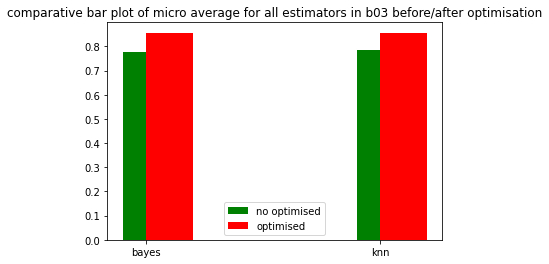

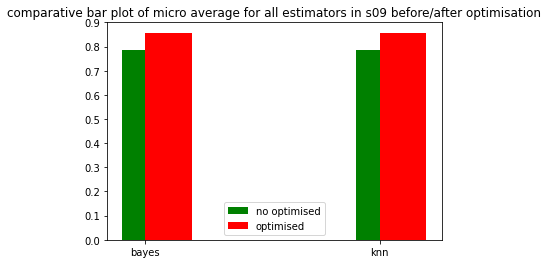

In [ ]:
#optimize KNN hyperparameter

from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
neighbors = [3,5,7,9,11]
model = KNeighborsClassifier()
pipe = Pipeline(steps=[('selector',selector),('scaler',scaler),('model',model)])
start = time.time()
est = GridSearchCV(pipe , param_grid = dict(model__n_neighbors=neighbors,selector__threshold=varArr), cv=10,
                   scoring=['f1_macro','f1_micro'] ,refit = 'f1_macro' )
est.fit(trainData,trainLabels)
preds = est.predict(testData)
dur = time.time()-start
print('gridsearch, train, predict time : {}hr : {}min : {:.2f} sec'.format(int(dur/3600),int(dur/60),dur))

stime['knn'] = dur
f1_macro =  f1_score(testLabels,preds,average='macro')
f1_micro = f1_score(testLabels, preds,average='micro')
sf1MacroDictOpt['knn'] = f1_macro
sf1MicroDictOpt['knn'] = f1_micro
print(est.best_params_)
p = precision_score(testLabels,preds)
r = recall_score(testLabels,preds)
print('precision = {:.5f} and recall = {:.5f}'.format(p,r))
print('macro before optimisation:\t{:.3f}\tand after opt:\t{:.3f}'.format(sf1MacroDict['knn'],sf1MacroDictOpt['knn']))
print('micro before optimisation:\t{:.3f}\tand after opt:\t{:.3f}'.format(sf1MicroDict['knn'],sf1MicroDictOpt['knn']))
print('confusion matrix:')
res = confusion_matrix(testLabels,preds)
print(res)

fig = plt.figure(19)
ax = fig.add_axes([0,0,1,1])
ax = plt.subplot(111)
ax.bar(sf1MacroDict.keys(),sf1MacroDict.values(), color='g', width=0.2, align = 'center',label = 'no optimised')
ax.bar(sf1MacroDictOpt.keys() , sf1MacroDictOpt.values(), color='r',width=0.2,align='edge', label = 'optimised')
ax.legend()
plt.title('comparative bar plot of micro average for all estimators in b03 before/after optimisation')
plt.show()


fig = plt.figure(9)
ax = fig.add_axes([0,0,1,1])
ax = plt.subplot(111)
ax.bar(sf1MicroDict.keys(),sf1MicroDict.values(), color='g', width=0.2, align = 'center',label = 'no optimised')
ax.bar(sf1MicroDictOpt.keys() , sf1MicroDictOpt.values(), color='r',width=0.2,align='edge', label = 'optimised')
ax.legend()
plt.title('comparative bar plot of micro average for all estimators in s09 before/after optimisation')
plt.show()

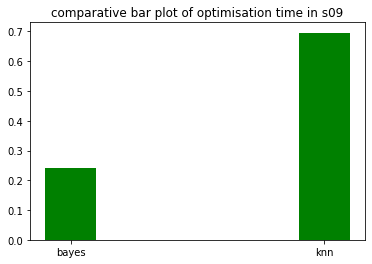

In [ ]:
fig = plt.figure(9)
ax = fig.add_axes([0,0,1,1])
ax = plt.subplot(111)
ax.bar(stime.keys(),stime.values(), color='g', width=0.2, align = 'center')
plt.title('comparative bar plot of optimisation time in s09')
plt.show()

Μετά την βελτισοποίηση καταλήξαμε σε ένα μοντέλο Gaussian Naive bayes με 2 στάδια προεπεξεργασίας, ένα variance threshold selector και ένα standard scaler και ένα μοντέλο KNN Classaifier με υπερπαράμετρο πησιέστερων γειτόνων 3 και 2 στάδια προεπεξεργασίας variance threshold selector και ένα standard scaler όπως παραπάνω. Ο βελτιστοποιημένος Naive Bayes έχει precission 84% που σημαίνει ότι το 84% των δειγμάτων που ταξινομήθηκαν στην κλάση 1 ανήκουν όντως στην κλάση 1 και recall 91.3% που σημαίνει ότι ταξινόμησε σωστά το 91.3% των δειγμάτων της κλάσης 1. Επίσης, συγκρίνοντας τους πίνακες σύγχησης για τον ταξινομητή gauss πριν και μετά την βελτιστοποίηση βλέπουμε ότι αυτός που προκύπτει μετά την βελτιστοποίηση έχει πιο πολλά στοιχεία στην κύρια διαγώνιο, ένδειξη ότι έχει γίνει σωστότερη ταξινόμηση. Για τον KNN ταξινομητή έχουμε precission 90% και recall 82.6%. Η επιλογή καλύτερου μοντέλου γίνεται βάσει των μετρικών f1-macro/f1-micro και συνεπώς επιλέγεται το KNN (f1_macro = 85.7%> 85.4% , f1_micro = 85.7% = 85.7%).

Τέλος, οι χρόνοι για την εύρεση των βέλτιστων παραμέτρων και αρχιτεκτονικής είναι 0.25 sec και 0.70 sec για τους Naive Bayes και KNN ταξινομητές. Και οι δύο χρόνοι είναι πολύ μικροί και αυτό είναι λογικό αφού ο χώρος αναζήτησης του βέλτιστου είναι πολύ μικρός και για τους 2 ταξινομητές.     

#"Μεγάλο" Dataset b03 (sat) 

##Βασικές Πληροφορίες.
1. Το dataset αυτό περιέχει ως δείγματα τμήματα εικονών 9 pixel ανά κομμάτι (3x3 τεράγωνα) και ανά εικόνα υπάρχουν 4 λήψεις που αντιστοιχούν σε διαφορετικό μέρος του φάσμματος. Οπότε για κάθε εικόνα υπάρχουν 4*9 = 36 χαρακτηριστικά. Οι τιμές των χαρακτηριστικών αυτών είναι τιμές από 0 έως 255 και αναπαριστούν το graysclale επίπεδο κάθε pixel. Τα χαρακτηριστικά είναι όλα ακέραια και πλήρως ταξινομημένα αφού όσο μεγαλύτερη είναι η τιμή ενός χαρακτηριστικού τόσο πιο ανοιχτόχρωμο είναι το pixel εκείνο στην συγκεκριμένη λήψη. Οι εικόνες κατατάσσονται σε 6 κατηγορίες κάθε μία από τις οποίες δηλώνεται με έναν εκ των αριθμών 1,2,3,4,5,7. Υπήρχε και κατηγορία νούμερο 6 στην οποία κατατάσσονταν εικόνες που περιήχαν στοιχεία όλων των άλλων κατηγοριών μαζί αλλά αφαιρέθηκε διότι ήταν αρκετά ασαφής. Οι κατηγορίες στις οποίες αντιστοιχίζονται  οι παραπάνω αριθμοί είναι κοκκινόχωμα, φυτεία βαμβακιού, βραχώδης έκταση(γκρι), βραχώδης έκταση με υγρασία (damp grey soil ? ), έδαφος με καλλιέργειες ή λασπωμένη έκταση. 
2.Το dataset (sat.trn + sat.tst) απαρτίζεται από 6433 δείγματα καθένα εκ των οποίων έχει 36 χαρακτηριστικά.  Τα χαρακτηριστικά είναι όλα ίδιου είδους, τιμές pixel σε grayscale σύστημα, οπότε θεωρούνται ταξινομημένα και δεν χρειάζεται ειδικός χειρισμός ως προς αυτό. 
3. Τα αρχεία sat.trn και sat.tst περιέχουν μόνο αριθμιτικά δεδομένα, χωρίς επικεφαλίδες ή αρίθμιση. Αυτό φαίνεται εκτελώντας print(data) όπου data ο πίνακας που αποθηκέυει τα περιεχόμενα των αρχείων για να τα επεξεργαστεί το σύστημα. 
4. Κάθε γραμμή του αρχείου αποτελεί ένα ένα δείγμα με 37 αριμούς, 36 χαρακτηριστικά και 1 κατηγορία. Η κατηγορία κωδικοποιείται με ένα ακέραιο στο σύνολο [1,2,3,4,5,7] και βρίσκεται στην τελευταία στήλη κάθε γραμμής. 
5. Τα αρχεία ανήχθησαν μέσω του pd.read_csv() και μεατράπηκαν από dataframes σε values. Τα αρχεία είναι 2 (sat.tst, sat.trn). Αφού διαβστούν τα συνενώνουμε σε έναν πίνακα ώστε να είναι δυνατός ο διαχωρισμός του συνόλου των δεδομένων στο επιθυμητό μέγεθος test-train. Επίσης, από τα αρχικά csv απομονώνονται οι τελυεταίες στήλες (που είναι οι ετικέτες) και τοποθετούνται σε άλλο πίνακα. 
6. Στο dataset  αυτό δεν  υπάρχουν απουσιάζουσες τιμές, κάτι το οποίο είναι γνωστό από το documentation του dataset στο UCI. 
7. Το dataset είναι εμφανώς ανισόρροπο όπως φαίνεται και από το διλαγραμμα πίτας στο αμέσως απόμενο κελί κώδικα. Παράδειγμα απότελεί κλάση 1 με παρουσία 23.8 και η 4 με παρουσία ~9% στο dataset.  
8. Η ανάγνωση των δεδομένων, ο διαχωρισμός σε train-test και ο έλεγχος για την ισορροπία των κλάσεων υλοποιούνται στο επόμενο κελί κώδικα.

(6433, 36)


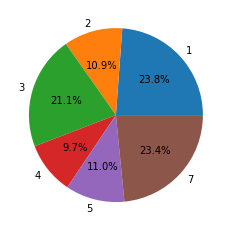

this  dataset is obviously imbalanced :(
(4503, 36)
(4503,)


In [ ]:
'''
read and preprocess the large dataset
'''
bfdTrain = pd.read_csv('sat.trn' , delimiter=' ').values
trainLabels = bfdTrain[:, 36]
trainData = bfdTrain[: , :36]
bfdTest = pd.read_csv('sat.tst' , delimiter= ' ').values
testLabels = bfdTest[: , 36]
testData = bfdTest[:, :36]
data = np.concatenate((trainData,testData), axis = 0)
labels = np.concatenate((trainLabels, testLabels) ,axis = 0)
print(data.shape)
bLabelCount = np.bincount(labels)
bLabelCount=np.delete(bLabelCount, 0)
bLabelCount=np.delete(bLabelCount , 5)
plt.pie(bLabelCount,labels=[1,2,3,4,5,7], autopct='%1.1f%%')
plt.show()
print('this  dataset is obviously imbalanced :(')
trainData, testData,trainLabels ,testLabels = train_test_split(data,labels,test_size = 0.3)
print(trainData.shape)
print(trainLabels.shape)

Μιας και για τους Dummy classifiers δεν απαιτείται κάποιοιυ είδους βελτιστοποίηση θα εκπαιδεύτούν ένα uniform, ένα stratified και ένα most_frequent μοντέλο Dummy Classifier και θα κρατήσουμε τα αποτελέσματα για benchmark στα επόμενα μοντέλα.  

In [ ]:
'''
messing with dummy classifiers 
'''
models = ['uniform', 'stratified', 'most_frequent', 
          'NB Gaussian', 'Knn' , 'MLP' , 'SVM']

f1MacroArr = [] 
f1MicroArr = []

bf1MacroDict = dict()
bf1MicroDict = dict()

bf1MacroDictOpt = {}
bf1MicroDictOpt = {}
btime = {}

from sklearn.dummy import DummyClassifier
DummyModels = []
DummyModels.append(DummyClassifier(strategy =  'uniform',  random_state=1))
DummyModels.append(DummyClassifier(strategy =  'stratified', random_state=1))
DummyModels.append(DummyClassifier(strategy =  'most_frequent', random_state=1))

for model in DummyModels:
  model.fit(trainData,trainLabels)
  preds = model.predict(testData)
  print('for dummy model with strategy {}'.format(model.strategy))
  f1_macro = f1_score(testLabels,preds,average='macro')
  f1_micro = f1_score(testLabels,preds,average='micro')
  f1MacroArr.append(f1_macro)
  f1MicroArr.append(f1_micro)
  p = precision_score(testLabels,preds,average='macro')
  r = recall_score(testLabels,preds, average='macro')
  print('precision = {:.5f} and recall = {:.5f}'.format(p,r))
  print('macro average:\t{:.3f}\tmicro average:\t{:.3f}'.format(f1_macro,f1_micro))
  print('confusion matrix:')
  res = confusion_matrix(testLabels,preds)
  print(res)
  print('---------------------------------------------')

for dummy model with strategy uniform
precision = 0.16515 and recall = 0.16184
macro average:	0.158	micro average:	0.166
confusion matrix:
[[85 77 77 71 75 77]
 [36 24 49 35 33 40]
 [58 69 73 78 61 65]
 [32 35 40 26 36 25]
 [26 36 28 43 44 35]
 [87 61 71 77 77 68]]
---------------------------------------------
for dummy model with strategy stratified
precision = 0.16428 and recall = 0.16512
macro average:	0.165	micro average:	0.190
confusion matrix:
[[100  54  93  44  64 107]
 [ 59  25  53  17  18  45]
 [ 79  35 103  39  44 104]
 [ 56  25  41  18  18  36]
 [ 42  27  49  21  16  57]
 [107  49 101  44  36 104]]
---------------------------------------------
for dummy model with strategy most_frequent
precision = 0.03990 and recall = 0.16667
macro average:	0.064	micro average:	0.239
confusion matrix:
[[462   0   0   0   0   0]
 [217   0   0   0   0   0]
 [404   0   0   0   0   0]
 [194   0   0   0   0   0]
 [212   0   0   0   0   0]
 [441   0   0   0   0   0]]
-----------------------------

In [ ]:
'''
naive bayes classifier
'''
from sklearn.naive_bayes import GaussianNB
modelNBC = GaussianNB()
modelNBC.fit(trainData,trainLabels)
preds = modelNBC.predict(testData)
f1_macro = f1_score(testLabels, preds, average = 'macro')
f1_micro = f1_score(testLabels, preds, average='micro')
f1MacroArr.append(f1_macro)
f1MicroArr.append(f1_micro)
bf1MacroDict['bayes'] = f1_macro
bf1MicroDict['bayes'] = f1_macro
p = precision_score(testLabels,preds, average='macro')
r = recall_score(testLabels,preds, average='macro')
print('precision = {:.5f} and recall = {:.5f}'.format(p,r))

print('macro average:\t{:.3f}\tmicro average:\t{:.3f}'.format(f1_macro,f1_micro))
print('confusion matrix:')
res = confusion_matrix(testLabels,preds)
print(res)
  

precision = 0.77738 and recall = 0.77915
macro average:	0.775	micro average:	0.795
confusion matrix:
[[381   1  16   0  64   0]
 [  8 190   0   3  15   1]
 [  5   0 365  32   0   2]
 [  3   0  30 123   6  32]
 [ 30   3   0   6 147  26]
 [  1   0   3  90  19 328]]


In [ ]:
'''
KNN classifier
'''
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier()
modelKNN.fit(trainData,trainLabels)
preds = modelKNN.predict(testData)
print(modelKNN)
f1_macro = f1_score(testLabels, preds, average='macro')
f1_micro = f1_score(testLabels, preds, average='micro')
f1MacroArr.append(f1_macro)
f1MicroArr.append(f1_micro)
bf1MacroDict['knn'] = f1_macro
bf1MicroDict['knn'] = f1_micro
p = precision_score(testLabels,preds, average='macro')
r = recall_score(testLabels,preds, average='macro')
print('precision = {:.5f} and recall = {:.5f}'.format(p,r))

print('macro average:\t{:.3f}\tmicro average:\t{:.3f}'.format(f1_macro,f1_micro))
print('confusion matrix:')
res = confusion_matrix(testLabels,preds)
print(res)
  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
precision = 0.87663 and recall = 0.86646
macro average:	0.871	micro average:	0.890
confusion matrix:
[[449   1   9   1   2   0]
 [  0 209   0   3   2   3]
 [  1   1 386  11   0   5]
 [  2   1  37 120   2  32]
 [ 10   4   4   2 177  15]
 [  0   1  11  43   9 377]]


In [ ]:
'''
MLP CLASSIFIER
'''

from sklearn.neural_network import MLPClassifier
MLPmodel = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(11,), random_state=1)
MLPmodel.fit(trainData , trainLabels)
preds = MLPmodel.predict(testData)
f1_macro = f1_score(testLabels, preds, average='macro')
f1_micro = f1_score(testLabels, preds, average='micro')
f1MacroArr.append(f1_macro)
f1MicroArr.append(f1_micro)
bf1MacroDict['mlp'] = f1_macro
bf1MicroDict['mlp'] = f1_micro
p = precision_score(testLabels,preds,average='macro')
r = recall_score(testLabels,preds,average='macro')
print('precision = {:.5f} and recall = {:.5f}'.format(p,r))

print('macro average:\t{:.3f}\tmicro average:\t{:.3f}'.format(f1_macro,f1_micro))
print('confusion matrix:')
res = confusion_matrix(testLabels,preds)
print(res)

precision = 0.72459 and recall = 0.70969
macro average:	0.716	micro average:	0.754
confusion matrix:
[[446   3   7   3   3   0]
 [  2 195   0   1  17   2]
 [  7   0 279  73   3  42]
 [  1   0  58  46   7  82]
 [ 11   4   3   4 146  44]
 [  0   0  28  54  16 343]]


In [ ]:
'''
SVM Classifier
'''

from sklearn.svm import SVC
model = SVC(kernel='poly')
model.fit(trainData,trainLabels)
print(model)
preds = model.predict(testData)
f1_macro = f1_score(testLabels, preds, average='macro')
f1_micro = f1_score(testLabels, preds, average='micro')
f1MacroArr.append(f1_macro)
f1MicroArr.append(f1_micro)
bf1MacroDict['svm'] = f1_macro
bf1MicroDict['svm'] = f1_micro
p = precision_score(testLabels,preds,average='macro')
r = recall_score(testLabels,preds,average='macro')
print('precision = {:.5f} and recall = {:.5f}'.format(p,r))

print('macro average:\t{:.3f}\tmicro average:\t{:.3f}'.format(f1_macro,f1_micro))
print('confusion matrix:')
res = confusion_matrix(testLabels,preds)
print(res)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
precision = 0.85376 and recall = 0.84028
macro average:	0.845	micro average:	0.874
confusion matrix:
[[449   0  11   0   2   0]
 [  0 208   0   3   5   1]
 [  1   2 373  25   1   2]
 [  2   2  40  95   5  50]
 [  6   4   2   2 174  24]
 [  0   0  15  27  12 387]]


Στο παρακάτω κελί κώδικα παρουσιάζονται δύο bar plots εκ των οποίων το ένα αφορά την απόδοση των μοντέλων ταξινόμησης χωρίς να έχει γίνει οποιαδήποτε μορφής βελτιστοποίηση είτε αυτή αφορά υπερμαραμέτρους είτε αφορά την αρχιτεκτονική του μοντέλου ή τα στάδια που μεσολαβούν έως την στιγμή που ο ταξινομητής κάνει train. 

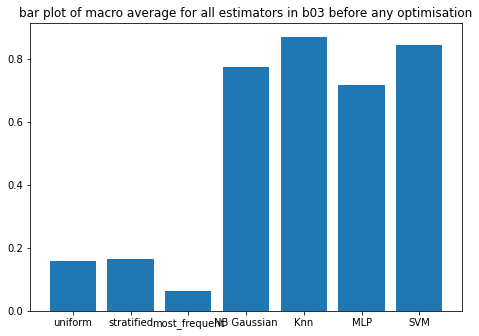

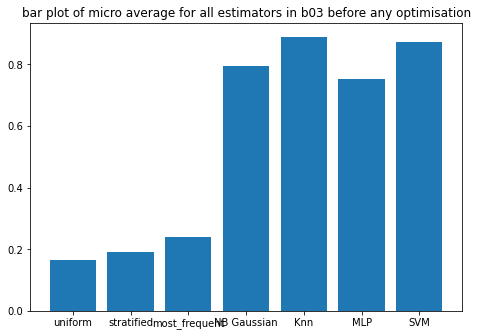

In [ ]:
fig = plt.figure(7)
ax = fig.add_axes([0,0,1,1])
ax.bar(models, f1MacroArr)
plt.title('bar plot of macro average for all estimators in b03 before any optimisation')
plt.show()

fig = plt.figure(8)
ax = fig.add_axes([0,0,1,1])
ax.bar(models, f1MicroArr)
plt.title('bar plot of micro average for all estimators in b03 before any optimisation')
plt.show()

### Σχολιασμός διαγραμμάτων και μετρικών

Το πρώτο που παρατηρείται πό τα παραπάνω διαγράμματα των μετρικών f1-macro, f1-micro είναι ότι οι Dummy Classifiers είναι πολύ χειρότεροι από τους Gaussian NB, Knn, MLP,SVM. Αυτό οφείλεται στις πολλές κλάσεις και την ανισοροπία του Dataset. <br>

 επόμενη παρατήρηση πρκύπτει από τους πίνακες σύγχησης. Σε όλα τα μοντέλα (χωρίς να κοιτάμε τα Dummy) παρατηρούμε ότι οι ταξινομητές "μπερδεύουν" την κλάση 4 με την κλάση 7. Αυτό το συμπεραίνουμε γιατί πολλά στοιχεία την κλάσης 7 ταξινομήθηκαν (από όλους τους ταξινομητές) στην 4 (πεδίο [6,4]) των πινάκων και πολλά στοιχεία της κλάσεις 4 ταξινομήθηκαν ως στοιχεία της κλάσης 7 (πεδίο [4,6]). Αυτό μπορεί να εκφράζει μια υποκεόμενη σχέση για τα δεδομένα. 

 <br> 
 Το precission των ταξινομητών κυμαίνεται από 72.4% (MLP) έως 87.6% (ΚΝΝ), το recall από 71% (MLP) έως 84.6% (MLP). Στις μετρικές f1_macro, f1_micro που αποτελούν και το κριτήριο μας για την επιλογή μοντέλου το KNN έχει τις υψηλότερες μετρικές (87.1% macro και 89% micro) και το MLP τις χειρότερες (71.6% macro και 75.4% micro).

Επόμενο βήμα αποτελεί η βελτιστοποίηση των μοντέλων και η εκ νέου αποτίμηση τους. Υπενθυμίζεται ότι για τους Dummy Classifiers δεν χρειάζεται να γίνει κάποια προεπεξεργασία. Στο επόμενο κελί κώδικα ακολουθεί η βελτιστοποίηση του Naive bayes Gaussian Classifier.

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')
import time 

model = GaussianNB()
selector = VarianceThreshold()   #only features with variance > threshhold are used
scaler = StandardScaler()        #scale data to mean = 0 and std dev =1
ros = RandomOverSampler()        #balance dataset's classes
pca = PCA()  

threshholds = [0.001,0.01,0.02,0.03,0.04] 

varMax = max(trainData.var(axis=0))
varMin = min(trainData.var(axis=0))
print(varMax)
print(varMin)
stepArr = [[('model', model)],
           [('pca', pca), ('model', model)],
           [('sampler', ros), ('pca', pca), ('model', model)],
           [('scaler', scaler), ('sampler', ros), ('pca', pca), ('model', model)],
           [('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('model', model)],
           [('selector', selector),('model', model)],
           [('scaler', scaler),('model', model)],
           [('selector', selector), ('scaler', scaler), ('model', model)],
           [('scaler', scaler), ('sampler', ros), ('pca', pca), ('model', model)]]
start = time.time()

maxAcc = 0 
for step in stepArr:     
  pipe = Pipeline(steps=step)
  pipe.fit(trainData, trainLabels)
  f1 = np.mean(cross_val_score(pipe,trainData, trainLabels,cv=5 , scoring='f1_macro'))
  if(f1 > maxAcc):
    maxModel = pipe
    maxAcc = f1

print('f1 score in cross validation : {:.3f}'.format(maxAcc))
model = maxModel
model.fit(trainData , trainLabels)
preds = model.predict(testData)
dur = time.time() - start
print('gridsearch, train, predict time : {}hr : {}min : {:.2f} sec'.format(int(dur/3600),int(dur/60),dur%60))
btime['bayes'] = dur
f1_macro = f1_score(testLabels, preds, average='macro')
f1_micro = f1_score(testLabels, preds, average='micro')

bf1MacroDictOpt['bayes'] = f1_macro
bf1MicroDictOpt['bayes'] = f1_micro
p = precision_score(testLabels,preds,average='macro')
r = recall_score(testLabels,preds,average='macro')
print('precision = {:.5f} and recall = {:.5f}'.format(p,r))

print('macro before optimisation:\t{:.3f}\tand after opt:\t{:.3f}'.format(bf1MacroDict['bayes'],bf1MacroDictOpt['bayes']))
print('micro before optimisation:\t{:.3f}\tand after opt:\t{:.3f}'.format(bf1MicroDict['bayes'],bf1MicroDictOpt['bayes']))
print('confusion matrix:')
res = confusion_matrix(testLabels,preds)
print(res)


523.5154676905271
179.08322396069008
f1 score in cross validation : 0.819
gridsearch, train, predict time : 0hr : 0min : 1.04 sec
precision = 0.80583 and recall = 0.81823
macro before optimisation:	0.775	and after opt:	0.811
micro before optimisation:	0.775	and after opt:	0.840
confusion matrix:
[[443   3   7   0   9   0]
 [  0 213   0   0   4   0]
 [  3   8 365  23   4   1]
 [  2   9  41 100   4  38]
 [  5  10   0   2 169  26]
 [  0   7  12  62  28 332]]


Παρακάτω ακολυθεί η βελτιστοποίηση του Knn classifier τόσο σε επίπεδο προεπεξεργασίας όσο και σε επίπεδο εύρεσης βέλτιστων υπερπαραμέτρων 

In [ ]:
'''
Knn classifier optimisation
'''
from timeit import default_timer as timer
from imblearn.pipeline import Pipeline
import numpy as np 
import time

model = KNeighborsClassifier()
selector = VarianceThreshold()   #only features with variance > threshhold are used
scaler = StandardScaler()        #scale data to mean = 0 and std dev =1
ros = RandomOverSampler()        #balance dataset's classes
pca = PCA()  

knn_nn = [1,3,5,7,9,11,13,15]
knn_metrics = ['euclidean', 'manhattan','chebyshev', 'minkowski' , 'seuclidean']
knn_weights = ['uniform']
pca_components = [i+1 for i in range(len(trainData[0]))]

pipe = Pipeline(steps = [('scaler', scaler) , ('pca', pca),('knn' , model)])
start = time.time()
est = GridSearchCV(pipe ,param_grid=dict(knn__n_neighbors=knn_nn,
                                         knn__metric=knn_metrics,
                                         knn__weights = knn_weights,
                                         pca__n_components=pca_components),
                                         cv=5,
                                         scoring= ['f1_macro','f1_micro'] , refit = 'f1_macro')
est.fit(trainData,trainLabels)
print(est.best_params_)
preds = est.predict(testData)
dur = time.time() - start
print('gridsearch, train, predict time : {}hr : {}min : {:.2f} sec'.format(int(dur/3600),int(dur/60),dur%60))
btime['knn'] = dur
f1_macro = f1_score(testLabels, preds, average='macro')
f1_micro = f1_score(testLabels, preds, average='micro')
bf1MacroDictOpt['knn'] = f1_macro
bf1MicroDictOpt['knn'] = f1_micro
p = precision_score(testLabels,preds,average='macro')
r = recall_score(testLabels,preds,average='macro')
print('precision = {:.5f} and recall = {:.5f}'.format(p,r))

print('macro average:\t{:.3f}\tmicro average:\t{:.3f}'.format(f1_macro,f1_micro))
print('macro before optimisation:\t{:.3f}\tand after opt:\t{:.3f}'.format(bf1MacroDict['knn'],bf1MacroDictOpt['knn']))
print('micro before optimisation:\t{:.3f}\tand after opt:\t{:.3f}'.format(bf1MicroDict['knn'],bf1MicroDictOpt['knn']))
print('confusion matrix:')
res = confusion_matrix(testLabels,preds)
print(res)

{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform', 'pca__n_components': 16}
gridsearch, train, predict time : 0hr : 10min : 5.83 sec
precision = 0.87601 and recall = 0.87242
macro average:	0.874	micro average:	0.891
macro before optimisation:	0.871	and after opt:	0.874
micro before optimisation:	0.890	and after opt:	0.891
confusion matrix:
[[452   1   7   0   2   0]
 [  0 208   0   3   3   3]
 [  1   2 378  17   0   6]
 [  1   2  35 128   2  26]
 [  7   3   1   2 183  16]
 [  0   0  13  49   9 370]]


Παρακάτω ακολουθεί η βελτιστοποίηση του MLP Classifier.

In [ ]:
model = MLPClassifier()
selector = VarianceThreshold()   #only features with variance > threshhold are used
scaler = StandardScaler()        #scale data to mean = 0 and std dev =1
ros = RandomOverSampler()        #balance dataset's classes
pca = PCA()  
pca_comps = [i for i in range(1,20)]
mlp_hiddenLayers = [(i,) for i in range(1,39)]
mlp_solver = ['adam' , 'lbfgs', 'sdg']
#mlp_solver = ['adam']
mlp_alpha = [10**(-i) for i in range(2,9)]

pipe = Pipeline(steps = [('pca' , pca) , ('scaler', scaler) ,('model',model)])
start = time.time() 
est = GridSearchCV(pipe, param_grid=dict(model__hidden_layer_sizes=mlp_hiddenLayers ,
                                         model__alpha = mlp_alpha,
                                         model__solver = mlp_solver), 
                                        cv = 5,
                                        scoring  = ['f1_macro','f1_micro'],
                                        refit='f1_macro' , 
                                        n_jobs = -1)

est.fit(trainData, trainLabels)

print(est.best_params_)
preds = est.predict(testData)
dur = time.time() - start
print('gridsearch, train, predict time : {}hr : {}min : {:.2f} sec'.format(int(dur/3600),int(dur/60),dur%60))
btime['mlp'] = dur
f1_macro = f1_score(testLabels, preds, average='macro')
f1_micro = f1_score(testLabels, preds, average='micro')

bf1MacroDictOpt['mlp'] = f1_macro
bf1MicroDictOpt['mlp'] = f1_micro
p = precision_score(testLabels,preds,average='macro')
r = recall_score(testLabels,preds,average='macro')
print('precision = {:.5f} and recall = {:.5f}'.format(p,r))

print('macro average:\t{:.3f}\tmicro average:\t{:.3f}'.format(f1_macro,f1_micro))
print('macro before optimisation:\t{:.3f}\tand after opt:\t{:.3f}'.format(bf1MacroDict['mlp'],bf1MacroDictOpt['mlp']))
print('micro before optimisation:\t{:.3f}\tand after opt:\t{:.3f}'.format(bf1MicroDict['mlp'],bf1MicroDictOpt['mlp']))
print('confusion matrix:')
res = confusion_matrix(testLabels,preds)
print(res)

{'model__alpha': 1e-06, 'model__hidden_layer_sizes': (38,), 'model__solver': 'adam'}
gridsearch, train, predict time : 0hr : 41min : 41.76 sec
precision = 0.86600 and recall = 0.85676
macro average:	0.860	micro average:	0.884
macro before optimisation:	0.716	and after opt:	0.860
micro before optimisation:	0.754	and after opt:	0.884
confusion matrix:
[[451   1   6   0   3   1]
 [  1 208   1   2   3   2]
 [  0   2 375  19   1   7]
 [  1   1  34 105   3  50]
 [  3   4   1   1 184  19]
 [  0   0  10  34  14 383]]


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='poly', max_iter=900)
selector = VarianceThreshold(threshold=varMin + 100)   #only features with variance > threshhold are used
scaler = StandardScaler()        #scale data to mean = 0 and std dev =1
ros = RandomOverSampler()        #balance dataset's classes
pca = PCA()  

#c, tol, loss hyperparameters
pipe = Pipeline(steps = [('scaler' , scaler) , ('model',model)])
svc_c = [0.001,0.01,0.1,10,100]
svc_tol = [10**i for i in range(-5,0)]
svc_degree = [i for i in range(1,6)]
svc_gamma = [10**i for i in range(-7,0)]
svc_gamma.append('scale')
start = time.time() 

est = GridSearchCV(pipe, param_grid=dict(model__C=svc_c,
                                         model__tol=svc_tol,
                                         model__degree=svc_degree,
                                         model__gamma=svc_gamma),
                                        cv=5, n_jobs=-1, scoring=['f1_macro','f1_micro'], 
                                        refit='f1_macro')

est.fit(trainData,trainLabels)
print(est.best_params_)
preds = est.predict(testData)

dur = time.time() - start
print('gridsearch, train, predict time : {}hr : {}min : {:.2f} sec'.format(int(dur/3600),int(dur/60),dur%60))
btime['svm'] = dur
f1_macro = f1_score(testLabels, preds, average='macro')
f1_micro = f1_score(testLabels, preds, average='micro')

bf1MacroDictOpt['svm'] = f1_macro
bf1MicroDictOpt['svm'] = f1_micro
p = precision_score(testLabels,preds,average='macro')
r = recall_score(testLabels,preds,average='macro')
print('precision = {:.5f} and recall = {:.5f}'.format(p,r))

print('macro average:\t{:.3f}\tmicro average:\t{:.3f}'.format(f1_macro,f1_micro))
print('macro before optimisation:\t{:.3f}\tand after opt:\t{:.3f}'.format(bf1MacroDict['svm'],bf1MacroDictOpt['svm']))
print('micro before optimisation:\t{:.3f}\tand after opt:\t{:.3f}'.format(bf1MicroDict['svm'],bf1MicroDictOpt['svm']))
print('confusion matrix:')
res = confusion_matrix(testLabels,preds)
print(res)


{'model__C': 100, 'model__degree': 3, 'model__gamma': 'scale', 'model__tol': 0.1}
gridsearch, train, predict time : 0hr : 50min : 9.12 sec
precision = 0.86508 and recall = 0.86582
macro average:	0.865	micro average:	0.883
macro before optimisation:	0.845	and after opt:	0.865
micro before optimisation:	0.874	and after opt:	0.883
confusion matrix:
[[450   0   9   0   3   0]
 [  1 206   0   4   4   2]
 [  0   2 352  43   1   6]
 [  4   1  26 127   5  31]
 [  5   3   1   2 185  16]
 [  0   1   5  38  12 385]]


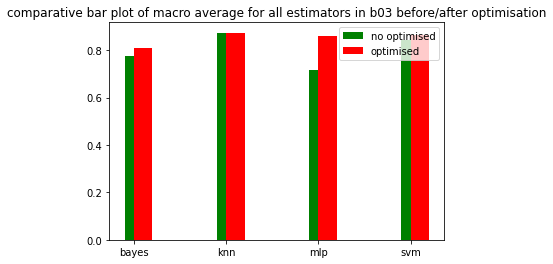

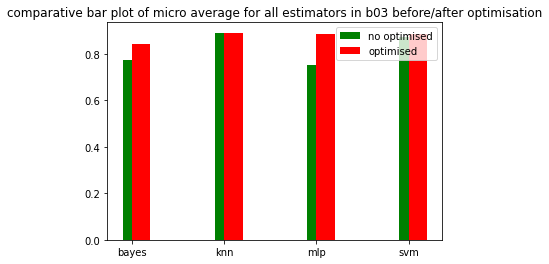

In [ ]:
fig = plt.figure(8)
ax = fig.add_axes([0,0,1,1])
ax = plt.subplot(111)
ax.bar(bf1MacroDict.keys(),bf1MacroDict.values(), color='g', width=0.2, align = 'center',label = 'no optimised')
ax.bar(bf1MacroDictOpt.keys() , bf1MacroDictOpt.values(), color='r',width=0.2,align='edge', label = 'optimised')
ax.legend()
plt.title('comparative bar plot of macro average for all estimators in b03 before/after optimisation')
plt.show()

fig = plt.figure(9)
ax = fig.add_axes([0,0,1,1])
ax = plt.subplot(111)
ax.bar(bf1MicroDict.keys(),bf1MicroDict.values(), color='g', width=0.2, align = 'center',label = 'no optimised')
ax.bar(bf1MicroDictOpt.keys() , bf1MicroDictOpt.values(), color='r',width=0.2,align='edge', label = 'optimised')
ax.legend()
plt.title('comparative bar plot of micro average for all estimators in b03 before/after optimisation')
plt.show()




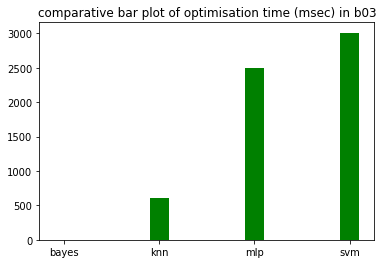

In [ ]:
fig = plt.figure(15)
ax = fig.add_axes([0,0,1,1])
ax = plt.subplot(111)
ax.bar(btime.keys(),btime.values(), color='g', width=0.2, align = 'center')
plt.title('comparative bar plot of optimisation time (msec) in b03')
plt.show()

Τα μοντέλα βελτιστοποιήθηκαν και για τον κάθε ταξινομητή επιλέχθηκαν οι βέλτιστες υπερπαράμετροι και οι βέλτιστες αρχιτεκτονικές. Οι υπερπαράμετροι βρέθηκαν με GridSearch σε έναν αρκετά ευρώ χώρο και οι αρχιτεκτονικές προέκυψαν εμπειρικά, μετά από αρκετές δομιμές και παραδείγματα. Στις περιπτώσεις, ένα στάδιο προεπεξεργασίας standardScaler πριν το μοντέλο είναι αυτό που δίνει τις καλύτερες επιδώσεις. 
<br>
Παρατηρώντας του νέους πίνακες σύγχησης παρατηρούμε ότι υπάρχει βελτίωση (μεγαλύτεροι αριθμοί στην κύρια διαγώνιο) αλλά όλοι οι ταξινομητές (άλλοι σε μεγαλύτερο βαθμο και άλλοι σε μικρότερο) κατατάσσουν πολλά στοιχεία της κλάσης 4 στην 7 και αντιστρόφως και το γεγονός αυτό συμβάλλει καθοριστικά στην μείωση των επιδόσεων των ταξινομητών.
<br>
Παρόλα αυτά όλοι οι ταξινομητές παρουσιάζουν αύξηση των επιδόσεων τους. Το precission πλέον κυμαίνεται από 80.5% (Gauss NB) έως 87.6% (KNN) ενώ το recall από 81.8% (Gauss NB) έως 87.2% (KNN). Ο ταξινομητής ωστόσο με την μεγαλύτερη βελτίωση είναι ο MLP ο οποίος από precission  72.4% και recall 71% εκτοξεύτηκε σε 86.5% και 85.6% αντίστοιχα. Στα f1-macro, f1-micro metrics ο KNN είναι ο καλύτερος ταξινομητής με f1-macro 87.6% και f1-micro 87.2%. Το μοντέλο λοιπόν που επιλέγεται για το συγκεκριμένω πρόβλημα είναι ο βελτισοποιημένος KNN ο οποίος έχει πολύ υψηλές αποδόσεις και πολύ χαμηλότερο χρόνο εκπαίδευσης (500 msec)  από τους MLP (2500 msec) και SVC (2500 msec) με τους οποίους έχει συγκρίσιμες μετριτικές. 

